# STEP 1: Importing requirede libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import io
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np

# STEP 2: Loading and Preprocessing an image

In [3]:
img_path = 'images_elephant.jpg'
img = image.load_img(img_path,target_size=(299,299))
img_array = image.img_to_array(img)
img_array_uint8 = img_array.astype(np.uint8)  # ← this is important for LIME

# Prepare batch for model prediction

img_batch = tf.expand_dims(img_array,0)
img_preprocessed = preprocess_input(img_batch)  # this is for the model only


# Step 3 – Loading a Pre-trained InceptionV3 Model


In [4]:
# We load the InceptionV3 model pre-trained on ImageNet
# This model is a powerful convolutional neural network (CNN) for image classification.
# The last layer is responsible for classification and it is removed to obtain a feature extractor.

base_model = InceptionV3(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.output)


# Step 4 – Making Predictions


In [5]:
# We use the loaded model to make predictions on the preprocessed image 
# and decode the predictions into human readable form. 
# This provides insights into what the model sees in the image

# Step 5 – Generating LIME Explanations


In [8]:
predictions = model.predict(img_preprocessed)
decoded_predictions = decode_predictions(predictions)[0]
print("Predictions: ")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions: 
1: African_elephant (0.52)
2: Indian_elephant (0.29)
3: tusker (0.08)
4: African_chameleon (0.00)
5: nail (0.00)


# Step 6 – Visualizing LIME Explanation


In [9]:
def classifier_fn(images):
    images = preprocess_input(images)
    return model.predict(images)

# 4. Explain using LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    img_array_uint8,                 # ← unprocessed original image
    classifier_fn,
    top_labels=5,
    hide_color=0,
    num_samples=1000
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

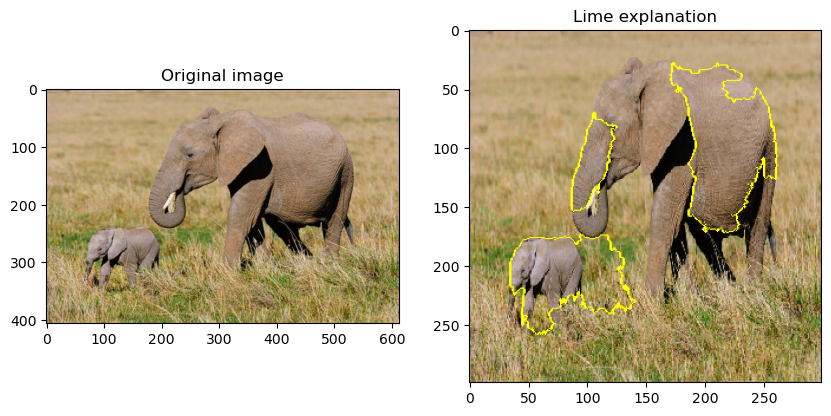

In [11]:
# Now we visualize the original image alongside the LIME explanation.
# LIME highlights the regions of the image that heavily influenced the model’s decision
# The mark_boundaries function helps visualize these regions.

original_image = img_array_uint8
#Display original image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(io.imread(img_path))
plt.title("Original image")

#Display LIME explanation

temp,mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features=5, hide_rest=False)
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(original_image/255.0, mask))
plt.title("Lime explanation")
plt.show()